# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering


# (1)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  50 100 101 103 104
 106 107 109 110 112 114 115 117 118 120 121 123 125 126 128 129 131 132
 134 136 137 139 140 142 143 145 146 148 150 151 153 154 156 157 159 161
 162 164 165 167 168 170 172 173 175 176 178 179 181 182 184 186 187 189
 190 192 193 195 197 198 200 201 203 204 206 208 209 211 212 214 215 217
 218 220 222 223 225 226 228 229 231 233 234 236 237 239 240 242 244 245
 247 248 250 251 253 255 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

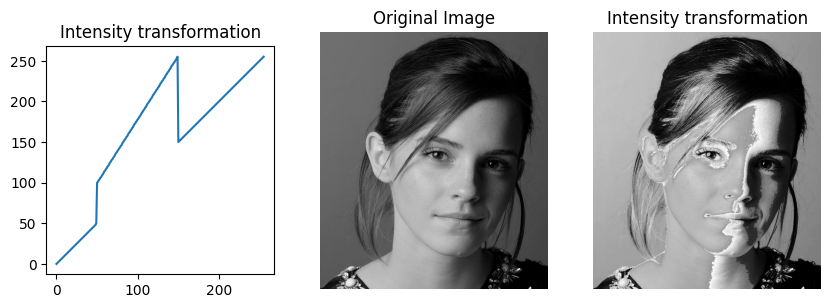

In [36]:

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img= cv.imread("emma.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None

t1=np.linspace(0,50,50)
t2=np.linspace(50,100,0)
t3=np.linspace(100,255,100)
t4=np.linspace(255,150,0)
t5=np.linspace(150,255,106)

t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
print(t)
assert len(t) == 256
g=cv.LUT(img,t)

fig, ax= plt.subplots(1,3,figsize=(10,10))

ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformation")
plt.show()

# (2)